In [1]:
# First import
import os, sys
print("First import completed.")

# Second import
from anomaly_detection_class import *
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

print("Second import completed.")

# Set config
# TEST_DIR = os.path.realpath(os.path.join(os.getcwd(), '..', 'test'))
DATA_DIR = 'D:\\Git Repository\\_local_data_\\DLW\\Orats\\'
# DATA_CLEAN_DIR = 'd:\\jupyter\\wooji\\repository\\Utils'

pd.set_option('display.max_rows', 500)
plt.style.use('seaborn')

# sys.path.append(TEST_DIR)
sys.path.append(DATA_DIR)
# sys.path.append(DATA_CLEAN_DIR)
print('Config all set.')

from read_option_data import *
# from anomaly_detection_helper import train_test_split
# import pickle
# import seaborn as sns
print("Third import completed.")


First import completed.
Second import completed.
Config all set.
Third import completed.


In [2]:
%%time
start_date = '20210903'
end_date = '20210907'
optionsdata = readMultiDay(DATA_DIR, start_date, end_date, ticker=['SPY'])

20210903 done!
20210904 is not a trading day.
20210905 is not a trading day.
20210906 is not a trading day.
20210907 done!
Wall time: 5.22 s


In [3]:
optionsdata.head()

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume,openinterest,impliedvol,delta,gamma,theta,vega,dte
0,SPY,453.23,SPY030921C0255,call,2021-09-03,2021-09-03,255.0,198.23,197.85,198.6,0,1,0.0,1.0,0.0,0.0,0.00001,0
1,SPY,453.23,SPY030921C0260,call,2021-09-03,2021-09-03,260.0,193.23,192.85,193.6,0,1,0.0,1.0,0.0,0.0,0.00001,0
2,SPY,453.23,SPY030921C0265,call,2021-09-03,2021-09-03,265.0,188.23,187.85,188.6,0,0,0.0,1.0,0.0,0.0,0.00001,0
3,SPY,453.23,SPY030921C0270,call,2021-09-03,2021-09-03,270.0,183.23,182.85,183.6,10,10,0.0,1.0,0.0,0.0,0.00001,0
4,SPY,453.23,SPY030921C0275,call,2021-09-03,2021-09-03,275.0,178.23,177.85,178.6,0,0,0.0,1.0,0.0,0.0,0.00001,0


In [25]:
ad = anomalyDetector()
ad.compile(_type='call', expiry='next', monthly=True, moneyness='otm', params=A1)
ad.fit(optionsdata, win_thresh)

Testing 0th combo


In [27]:
ad.evaluate(winprob=0.7, topn=10)

,winprob,outliernum,posret,negret,expret,volume/impliedvol
0,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.0]"
1,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.1]"
2,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.2]"
3,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.3]"
4,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.4]"
5,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.5]"
6,0.750,8,0.068,-0.034,0.042500,"[1.0, 0.6]"
10,0.750,8,0.068,-0.034,0.042500,"[1.1, 0.0]"
11,0.750,8,0.068,-0.034,0.042500,"[1.1, 0.1]"
12,0.750,8,0.068,-0.034,0.042500,"[1.1, 0.2]"


In [29]:
thresh = {'A1':[1.0, 0.6]}

params = {'A1':A1}

window = {'A1':60}

split_date = '2019-06-01'
classes = ['A1']
win_thresh = 0
test_perform = {'A1':[]}
symbol_arr = {'A1':[]}

ad.predict(optionsdata, win_thresh,thresh['A1'],verbose=False)

In [30]:
ad._test_outlier

DatetimeIndex(['2021-03-26', '2021-03-31', '2021-05-12', '2021-05-18',
               '2021-05-19', '2021-05-21', '2021-06-23', '2021-06-24'],
              dtype='datetime64[ns]', name='quotedate', freq=None)

In [31]:
optionsdata.head()

,underlying,underlying_last,optionroot,type,expiration,quotedate,strike,last,bid,ask,volume,openinterest,impliedvol,delta,gamma,theta,vega,dte
0,TSLA,837.45,TSLA050221C0200,call,2021-02-05,2021-02-01,200.0,637.46,637.05,638.25,0,1,0.00000,1.0,-0.0,-0.002073,0.00001,4
1,TSLA,837.45,TSLA050221C0250,call,2021-02-05,2021-02-01,250.0,587.46,587.00,588.05,0,1,0.00000,1.0,-0.0,-0.002591,0.00001,4
2,TSLA,837.45,TSLA050221C0300,call,2021-02-05,2021-02-01,300.0,537.46,537.15,537.90,0,17,1.98528,1.0,0.0,-0.003110,0.00001,4
3,TSLA,837.45,TSLA050221C0350,call,2021-02-05,2021-02-01,350.0,487.46,487.10,487.85,10,11,1.67893,1.0,0.0,-0.003628,0.00001,4
4,TSLA,837.45,TSLA050221C0360,call,2021-02-05,2021-02-01,360.0,477.46,477.05,478.05,1,2,1.70870,1.0,0.0,-0.003732,0.00001,4


In [41]:
call_df = optionsdata.loc[optionsdata.type == 'call']

In [42]:
call_group_df = call_df.groupby(by = ['quotedate']).sum()

<AxesSubplot:xlabel='quotedate'>

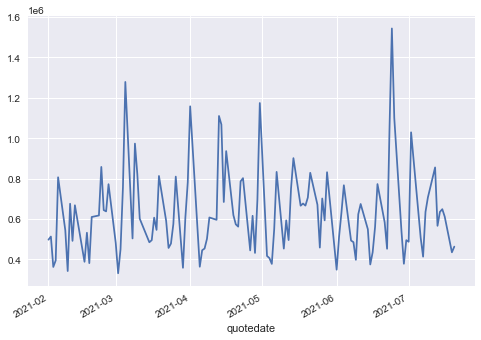

In [35]:
call_group_df.volume.plot()

<AxesSubplot:xlabel='quotedate'>

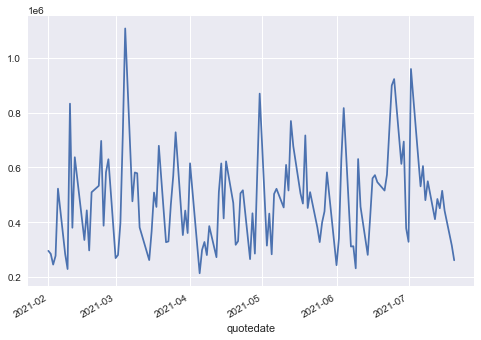

In [37]:
put_df = optionsdata.loc[optionsdata.type == 'put']
put_group_df = put_df.groupby(by = ['quotedate']).sum()
put_group_df.volume.plot()

In [44]:
put_call_ratio = put_group_df.volume / call_group_df.volume